In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import cv2, os
import glob
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.optimizer_v2 import rmsprop

In [ ]:
label_dict = {"Fake_img":1,"Real_img":0}
categories = ["Fake_img", "Real_img"]
folder_num = 3

In [ ]:
# 리얼 흑백이미지 폴더 glob
destination_folder = f'/content/drive/MyDrive/crop/Real_img{folder_num}'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

# 페이크 흑백이미지 폴더 glob
destination_folder = f'/content/drive/MyDrive/crop/Fake_img{folder_num}'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

# 모델 폴더 glob
destination_folder = '/content/drive/MyDrive/model'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

In [ ]:
data=[]
target=[]

# 저장한 흑백 파일들 읽어옴
for category in categories:
    img_names=glob.glob(f"/content/drive/MyDrive/crop/{category}{folder_num}/*.jpg")
    print(len(img_names))

    for idx, img_name in enumerate(img_names[:5000]):
        img=cv2.imread(img_name)

        try:
            data.append(img)
            target.append(label_dict[category])
            print(category, idx)

        except Exception as e:
            print('Exception:', e)

# target에 제대로 들어갔는지 개수 확인
from collections import Counter
counter = Counter(target)
print("target:",counter)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Real_img 1
Real_img 2
Real_img 3
Real_img 4
Real_img 5
Real_img 6
Real_img 7
Real_img 8
Real_img 9
Real_img 10
Real_img 11
Real_img 12
Real_img 13
Real_img 14
Real_img 15
Real_img 16
Real_img 17
Real_img 18
Real_img 19
Real_img 20
Real_img 21
Real_img 22
Real_img 23
Real_img 24
Real_img 25
Real_img 26
Real_img 27
Real_img 28
Real_img 29
Real_img 30
Real_img 31
Real_img 32
Real_img 33
Real_img 34
Real_img 35
Real_img 36
Real_img 37
Real_img 38
Real_img 39
Real_img 40
Real_img 41
Real_img 42
Real_img 43
Real_img 44
Real_img 45
Real_img 46
Real_img 47
Real_img 48
Real_img 49
Real_img 50
Real_img 51
Real_img 52
Real_img 53
Real_img 54
Real_img 55
Real_img 56
Real_img 57
Real_img 58
Real_img 59
Real_img 60
Real_img 61
Real_img 62
Real_img 63
Real_img 64
Real_img 65
Real_img 66
Real_img 67
Real_img 68
Real_img 69
Real_img 70
Real_img 71
Real_img 72
Real_img 73
Real_img 74
Real_img 75
Real_img 76
Real_img 77
Real_img 78
Real_img 79
Real_img 80
Real_img 81
R

In [ ]:
# 모델의 입력은 4차원 텐서여야 함
data=np.array(data)
data=np.reshape(data,(data.shape[0], 256, 256, 3)) # (사진 장수, 가로픽셀, 세로픽셀, 채널)

# 타겟은 2차원 numpy array임
target=np.array(target)

# 데이터, 타겟(라벨) 형태 확인
print("data.shape:",data.shape)
print("target.shape:",target.shape)

# Train Test Split
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# (사진 장수, 가로, 세로, 채널) 에서 (가로, 세로, 채널) 입력 사이즈 확인
input_shape=data.shape[1:]
input_shape

data.shape: (10000, 256, 256, 3)
target.shape: (10000,)


(256, 256, 3)

array([[[  3,  11,  24],
        [  0,   8,  21],
        [  0,   6,  19],
        ...,
        [161, 177, 189],
        [157, 175, 186],
        [160, 178, 189]],

       [[  3,  11,  24],
        [  0,   8,  21],
        [  0,   6,  19],
        ...,
        [127, 143, 155],
        [154, 172, 183],
        [164, 182, 193]],

       [[  3,   9,  22],
        [  1,   7,  20],
        [  0,   6,  19],
        ...,
        [ 70,  88,  99],
        [134, 152, 163],
        [164, 182, 193]],

       ...,

       [[  5,   0,   1],
        [  6,   1,   2],
        [  6,   1,   2],
        ...,
        [ 43,  41,  47],
        [ 38,  36,  42],
        [ 31,  29,  35]],

       [[  6,   1,   2],
        [  6,   1,   2],
        [  7,   2,   3],
        ...,
        [ 46,  44,  50],
        [ 41,  39,  45],
        [ 34,  32,  38]],

       [[  7,   2,   3],
        [  7,   2,   3],
        [  8,   3,   4],
        ...,
        [ 45,  43,  49],
        [ 40,  38,  44],
        [ 35,  33,  39]]], dtype=uint8)
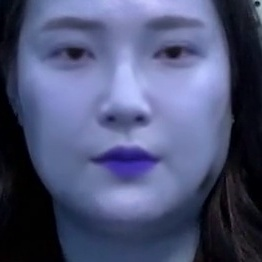

In [ ]:
data[68]

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:

inputs = keras.Input(shape=(256, 256, 3))
x = inputs
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 256, 256, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 256, 256, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               838886

In [ ]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/aihub/best_model/crop2-022-0.0196.hdf5")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
#         filepath="feature_extraction_with_data_augmentation.keras",
        filepath="/content/drive/MyDrive/model/crop33-{epoch:03d}-{val_loss:.4f}.hdf5",
        save_best_only=True,
        monitor="val_loss")
]

history=model.fit(x_train, y_train,
                  epochs=100,
                  batch_size=160,
                  callbacks=callbacks,
                  validation_data=(X_test, y_test))

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 5.0131 - accuracy: 0.9220

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 79s 1s/step - loss: 5.0131 - accuracy: 0.9220 - val_loss: 0.5847 - val_accuracy: 0.9810
Epoch 2/100
50/50 [==============================] - 39s 792ms/step - loss: 0.9253 - accuracy: 0.9693 - val_loss: 0.1665 - val_accuracy: 0.9860
Epoch 3/100
50/50 [==============================] - 40s 796ms/step - loss: 0.2443 - accuracy: 0.9829 - val_loss: 0.0518 - val_accuracy: 0.9940
Epoch 4/100
50/50 [==============================] - 39s 780ms/step - loss: 0.3668 - accuracy: 0.9791 - val_loss: 0.1581 - val_accuracy: 0.9900
Epoch 5/100
50/50 [==============================] - 39s 789ms/step - loss: 0.4293 - accuracy: 0.9833 - val_loss: 0.0429 - val_accuracy: 0.9970
Epoch 6/100
50/50 [==============================] - 39s 783ms/step - loss: 0.1832 - accuracy: 0.9891 - val_loss: 6.3664 - val_accuracy: 0.7695
Epoch 7/100
50/50 [==============================] - 39s 785ms/step - loss: 0.2345 - accuracy: 0.9910 - val_loss: 0.0411 - val_accuracy: 0.9945
Epoch 8

In [ ]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)
# save to csv:
hist_csv_file = f'/content/drive/MyDrive/model/history_crop{folder_num}.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

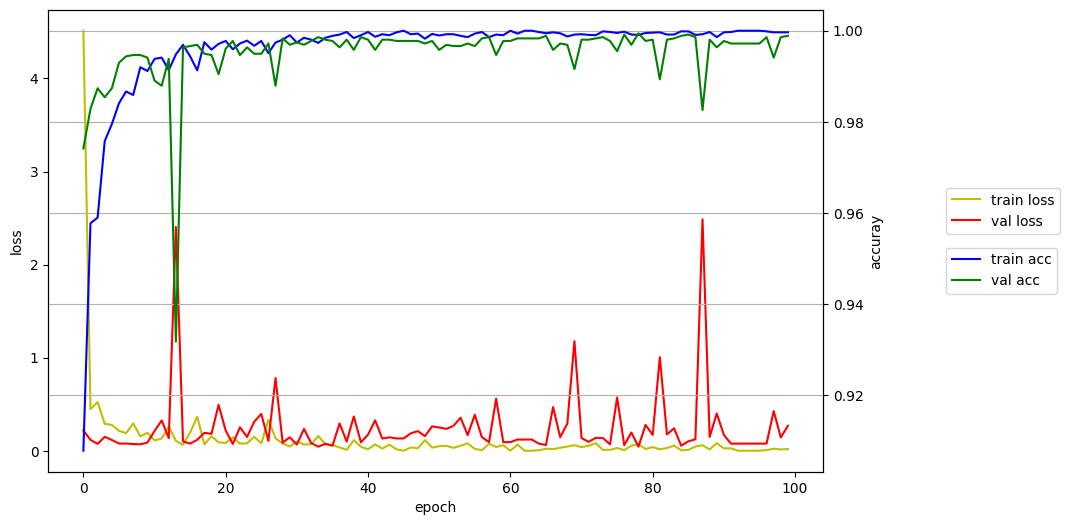

In [ ]:
# 학습 그래프 그리기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,6))
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

acc_ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5))
loss_ax.legend(loc='lower left', bbox_to_anchor=(1.15, 0.5))

plt.grid()
plt.show()

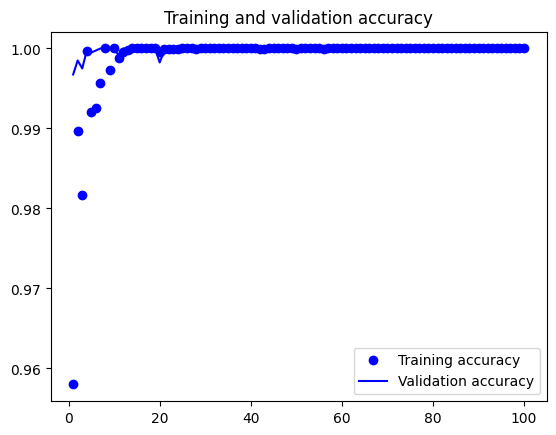

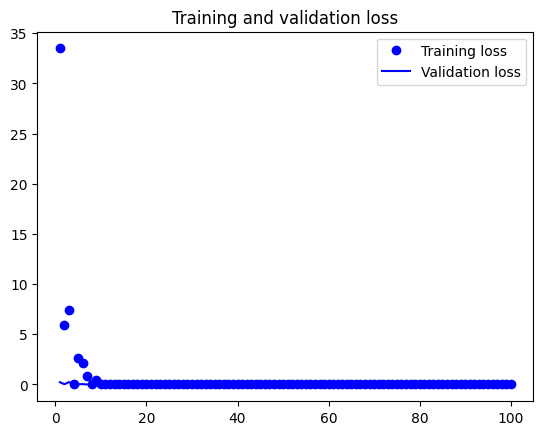

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
import keras
model = keras.models.load_model("/content/drive/MyDrive/aihub/best_model/crop3-034-0.0432.hdf5")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# X_test로 만든 pred
pred = model.predict(X_test)

112/112 [==============================] - 14s 128ms/step


In [ ]:

threshold = 0.5
c_pred = np.array([1 if pr >= threshold else 0 for pr in pred])
c_pred

array([0, 1, 0, ..., 1, 1, 0])

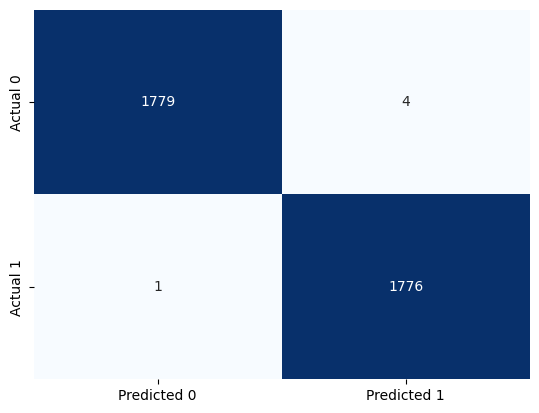

In [ ]:
# confusion matrix 이쁘게
import seaborn as sns
cm = confusion_matrix(y_test, c_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

# F1, acc, recall 구하기
f1_score = f1_score(y_test, c_pred)
acc_score = accuracy_score(y_test, c_pred)
recall_score = recall_score(y_test, c_pred)

print("F1-score:")
print(f"{f1_score:0.5f}")

print("acc-score:")
print(f"{acc_score:0.5f}")

print("recall-score:")
print(f"{recall_score:0.5f}")

F1-score:
0.99859
acc-score:
0.99860
recall-score:
0.99944
